### Model Testing Analysis

In [1]:
import os
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

os.listdir("performance_result")[:5]

['LlamaParser_gpt-3.5-turbo-0125_DB Concepts Chapter1.pdf.csv',
 'LlamaParser_gpt-3.5-turbo-0125_DB Concepts Chapter2.pdf.csv',
 'LlamaParser_gpt-3.5-turbo-0125_DB Concepts Chapter3.pdf.csv',
 'LlamaParser_gpt-3.5-turbo_DB Concepts Chapter1.pdf.csv',
 'LlamaParser_gpt-3.5-turbo_DB Concepts Chapter2.pdf.csv']

In [2]:
file_list = os.listdir("examplefiles")
loader_list = ["LlamaParser", "PyPDFLoader", "PyMyPDF4llm"]
llm_list = ["gpt-3.5-turbo", "gpt-3.5-turbo-0125", "gpt-4o", "gpt-4o-2024-11-20", "gpt-4o-mini"]

In [3]:
# example : LlamaParser + gpt-3.5-turbo performance

df_list = []

for filename in file_list:
    PATH = f"performance_result/{loader_list[0]}_{llm_list[0]}_{filename}.csv"
    if os.path.exists(PATH):
        df = pd.read_csv(PATH)
        df_list.append(df)

performance_result = pd.concat(df_list).iloc[:,1:]
performance_result.head()

,user_input,retrieved_contexts,response,reference,answer_relevancy,context_precision,faithfulness,context_recall,answer_correctness
0,Please tell me some representative examples of...,['What are five main functions of a database a...,Some representative examples of database appli...,Database can be used for Enterprise Informatio...,0.971825,0.0,0.00,1.000000,0.216778
1,What kinds of data storage is used in 1950s?,['- Late 1960s and 1970s: Widespread use of ha...,I don't know.,Magnetic tapes were developed for data storage...,0.000000,0.0,0.00,0.000000,0.182245
2,Relational model concept is defined by whom? P...,['- Relational Model. The relational model use...,I don't know.,A landmark paper by Codd [1970] defined the re...,0.000000,1.0,0.00,1.000000,0.181300
3,What is DML and DDL?,['# Chapter 1\n\n# Introduction\n\nIn practice...,"DML stands for Data Manipulation Language, whi...",A data-manipulation language (DML) is a langua...,0.920456,1.0,0.50,0.500000,0.740044
4,Please briefly introduce the disadvantages of ...,['# Practice Exercises\n\n1. 1.1 This chapter ...,The disadvantages of managing structural data ...,File system may have data redundancy and incon...,0.973686,0.0,0.75,0.666667,0.468990


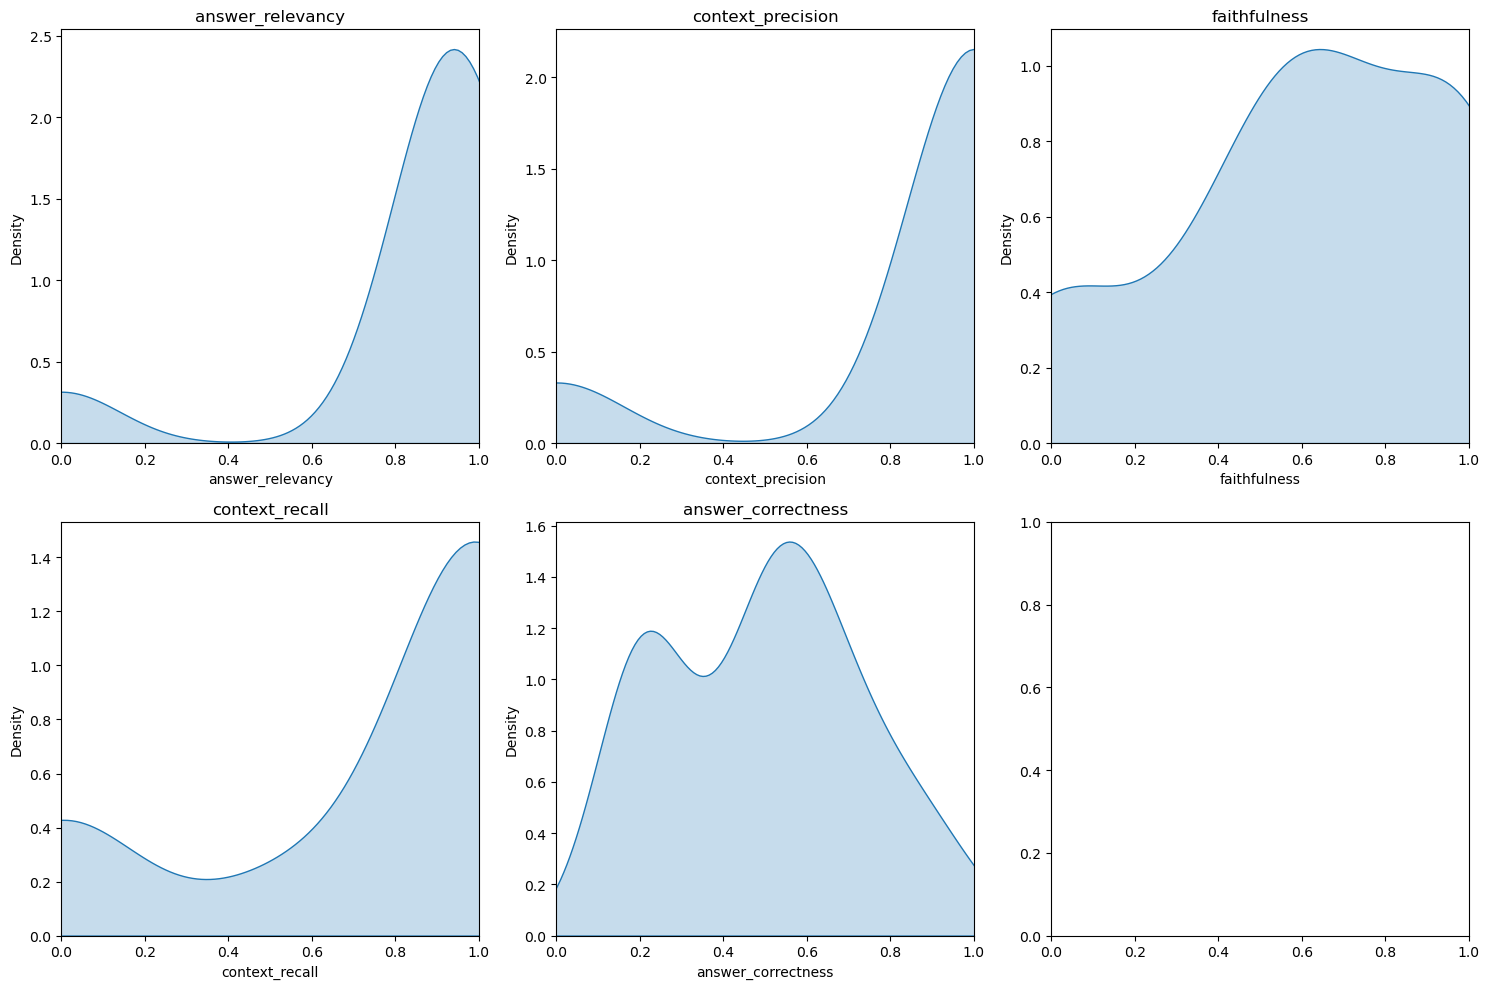

In [4]:
# example : LlamaParser + gpt-3.5-turbo performance VISUALIZATION

import matplotlib.pyplot as plt
import seaborn as sns

figure, ax = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

for row in range(2):
    for col in range(3):
        if (3*row+col) == 5:
            break
        data = performance_result.iloc[:,-5+(3*row+col)]
        sns.kdeplot(data=data, fill=True, ax=ax[row, col])
        ax[row,col].set(title=performance_result.columns[-5+(3*row+col)])
        ax[row,col].set_xlim([0, 1])

plt.tight_layout()
plt.show()

### Statistics Comparison : Loaders

In [5]:
loaders_performance_dict = {"LlamaParser" : None, "PyPDFLoader" : None, "PyMyPDF4llm" : None}

for loader in loader_list:
    df_list = [] # loader+file 조합의 결과 list. element는 pd.DataFrame
    for llm in llm_list:
        for file in file_list:
            PATH = f"performance_result/{loader}_{llm}_{file}.csv"
            if os.path.exists(PATH):
                df = pd.read_csv(PATH)
                df_list.append(df)
    loaders_performance_dict[loader] = pd.concat(df_list).iloc[:,1:]

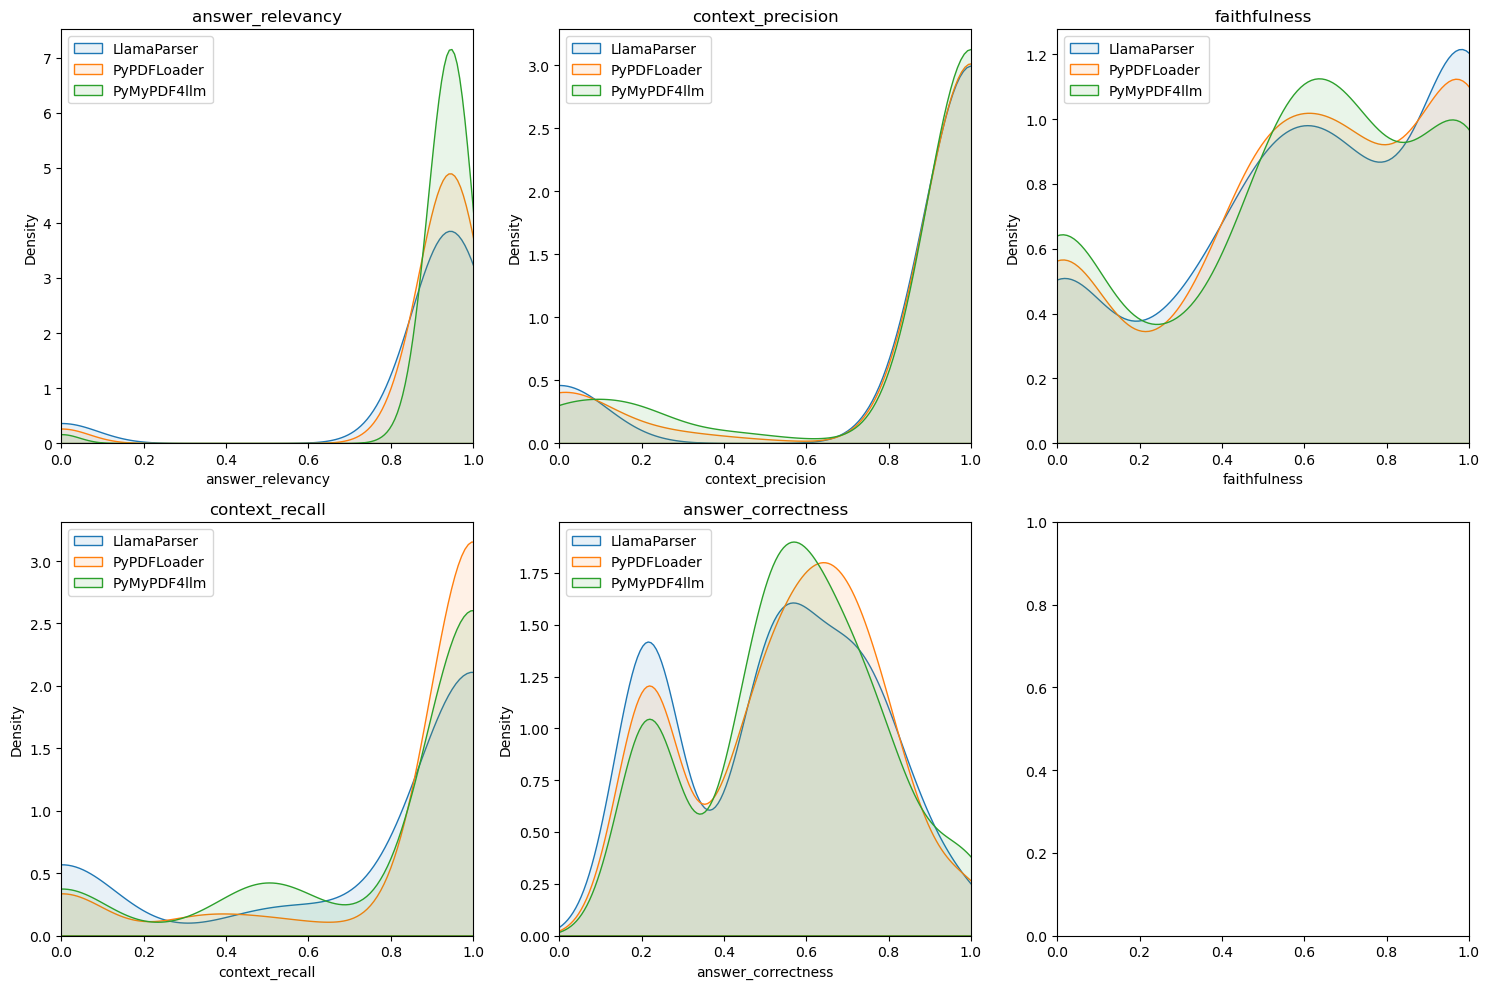

In [6]:
figure, ax = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

for row in range(2):
    for col in range(3):
        if (3*row+col) == 5:
            break
        for loader in loader_list:
            data = loaders_performance_dict[loader].iloc[:,-5+(3*row+col)]
            sns.kdeplot(data=data, fill=True, alpha=.1, ax=ax[row, col], label=loader)
            ax[row,col].set(title=performance_result.columns[-5+(3*row+col)])
            ax[row,col].set_xlim([0, 1])
            ax[row,col].legend()

plt.tight_layout()
plt.show()

### Statistics Comparison : LLMs

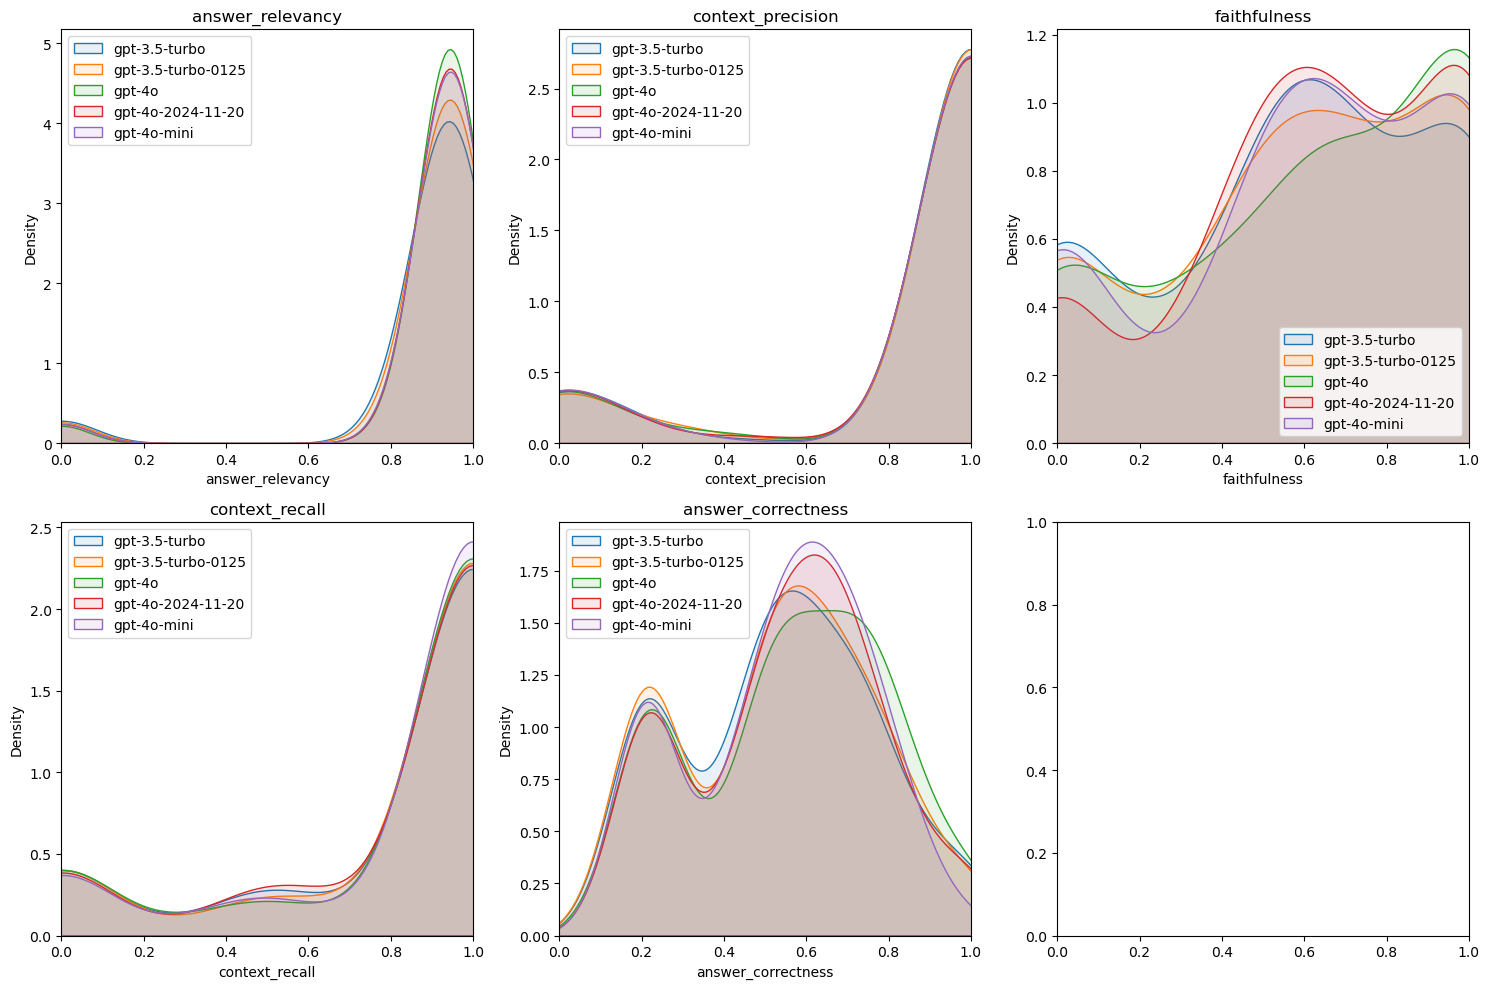

In [7]:
llm_performance_dict = {"gpt-3.5-turbo" : None, "gpt-3.5-turbo-0125" : None, 
                        "gpt-4o" : None, "gpt-4o-2024-11-20" : None, "gpt-4o-mini" : None}

for llm in llm_list:
    df_list = [] # loader+file 조합의 결과 list. element는 pd.DataFrame
    for loader in loader_list:
        for file in file_list:
            PATH = f"performance_result/{loader}_{llm}_{file}.csv"
            if os.path.exists(PATH):
                df = pd.read_csv(PATH)
                df_list.append(df)
    llm_performance_dict[llm] = pd.concat(df_list).iloc[:,1:]


figure, ax = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

for row in range(2):
    for col in range(3):
        if (3*row+col) == 5:
            break
        for llm in llm_list:
            data = llm_performance_dict[llm].iloc[:,-5+(3*row+col)]
            sns.kdeplot(data=data, fill=True, alpha=.1, ax=ax[row, col], label=llm)
            ax[row,col].set(title=performance_result.columns[-5+(3*row+col)])
            ax[row,col].set_xlim([0, 1])
            ax[row,col].legend()

plt.tight_layout()
plt.show()

### Statistics Comparison : Loaders + LLMs

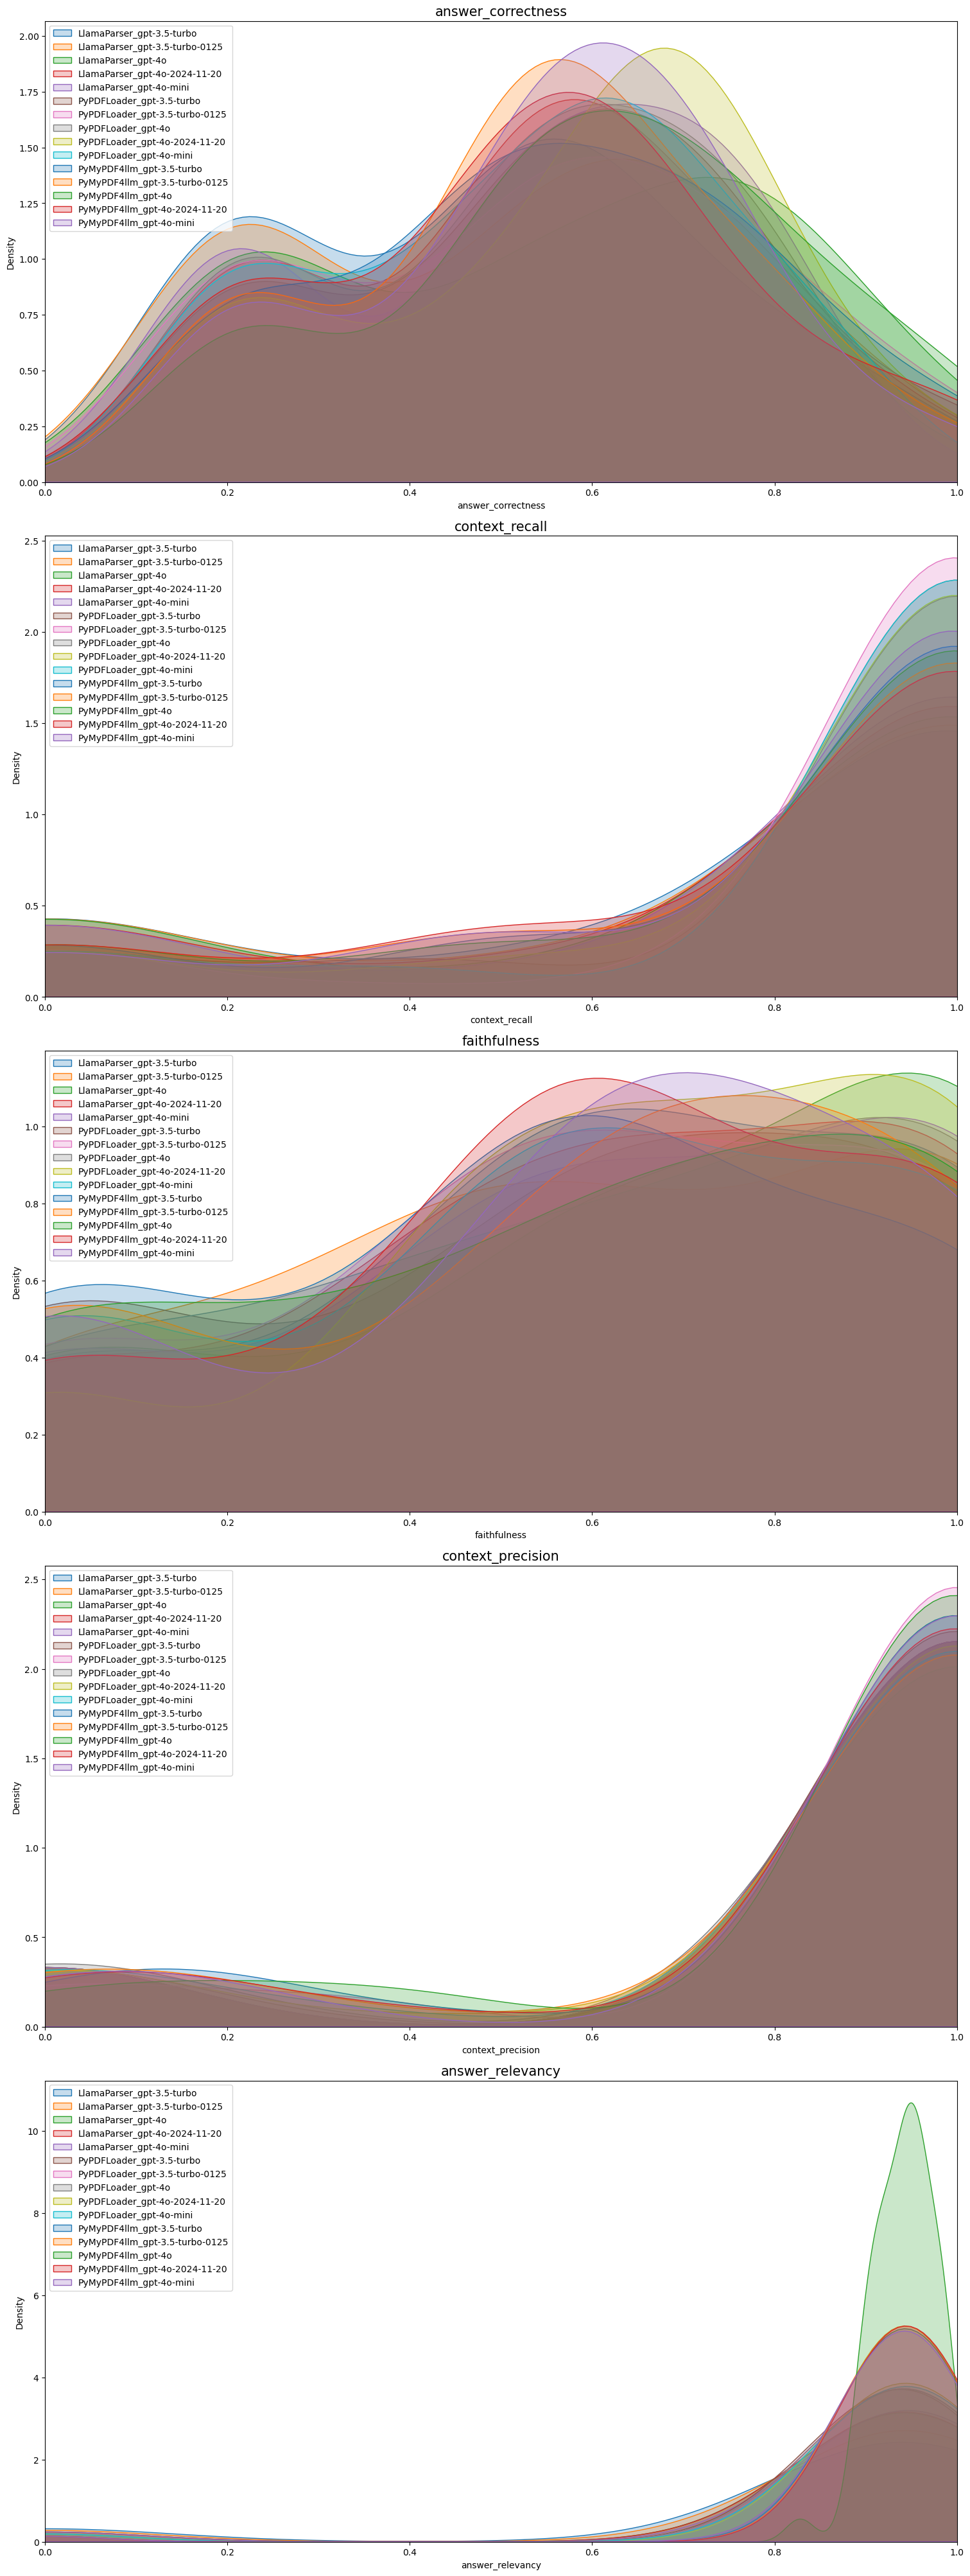

In [8]:
performance_dict_keys = [f"{x}_{y}" for x in loader_list for y in llm_list]
performance_dict = {key : None for key in performance_dict_keys}

for model in performance_dict.keys():
    df_list = []
    for file in file_list:
        PATH = f"performance_result/{model}_{file}.csv"
        if os.path.exists(PATH):
            df = pd.read_csv(PATH)
            df_list.append(df)
    performance_dict[model] = pd.concat(df_list).iloc[:,1:].reset_index(drop=True)

figure, ax = plt.subplots(nrows=5, ncols=1, figsize=(15,40), constrained_layout=True)

for row in range(5):
    ax[row].set_title(performance_dict[performance_dict_keys[0]].columns[-(row+1)], size=15)
    for model in performance_dict_keys:
        data = performance_dict[model].iloc[:,-(row+1)]
        sns.kdeplot(data=data, fill=True, ax=ax[row], label=model)
        ax[row].set_xlim([0, 1])
        ax[row].legend()

plt.show()

### Combine All 5 Metrics

In [9]:
performance45_dict = {key:None for key in performance_dict_keys}
for key in performance_dict_keys:
    performance45_dict[key] = performance_dict[key].iloc[:, -5:].sum(axis=1)

performance45_dict = dict(sorted(performance45_dict.items(), key=lambda x : x[1].median(), reverse=True))
performance45_dict = pd.DataFrame.from_dict(performance45_dict)

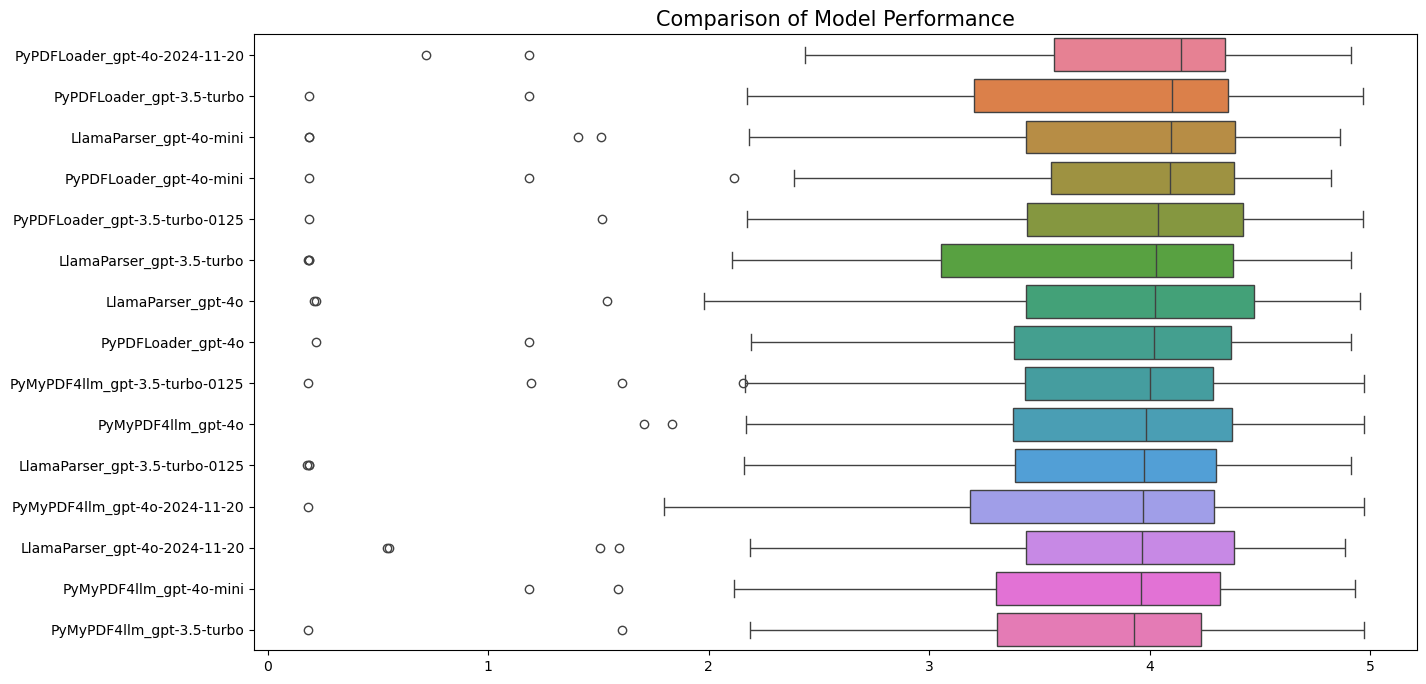

In [10]:
plt.figure(figsize=(15, 8))
sns.boxplot(performance45_dict, orient="h")
plt.title("Comparison of Model Performance", size=15)
plt.show()

# 15개 모델 성능값의 전체적인 평균(mean or median)은 비슷해보인다.

In [11]:
performance45_dict

,PyPDFLoader_gpt-4o-2024-11-20,PyPDFLoader_gpt-3.5-turbo,LlamaParser_gpt-4o-mini,PyPDFLoader_gpt-4o-mini,PyPDFLoader_gpt-3.5-turbo-0125,LlamaParser_gpt-3.5-turbo,LlamaParser_gpt-4o,PyPDFLoader_gpt-4o,PyMyPDF4llm_gpt-3.5-turbo-0125,PyMyPDF4llm_gpt-4o,LlamaParser_gpt-3.5-turbo-0125,PyMyPDF4llm_gpt-4o-2024-11-20,LlamaParser_gpt-4o-2024-11-20,PyMyPDF4llm_gpt-4o-mini,PyMyPDF4llm_gpt-3.5-turbo
0,2.855293,2.189490,2.418642,2.418103,2.189190,2.188602,2.188005,2.190400,2.958167,3.125893,2.188602,3.187281,2.187514,2.988080,3.188937
1,3.313540,4.038448,1.511466,3.227694,4.037151,0.182245,1.538889,3.384786,0.182245,1.708160,0.178921,0.182245,1.507966,1.587599,0.182245
2,2.437399,2.435284,3.437399,2.511616,2.435284,2.181300,3.437399,2.437399,3.435284,3.437399,3.435284,3.437399,3.437399,3.437399,3.435284
3,4.617276,4.160417,4.445365,4.608296,4.632236,3.660500,4.168293,4.305882,4.160500,4.227986,3.660500,4.251651,3.758249,4.188330,4.160417
4,3.487670,3.916116,3.290615,3.701334,3.146221,2.859342,2.734685,3.735190,3.796678,3.967099,2.541606,3.968934,2.600559,4.179604,3.792948
5,3.566880,2.946973,4.294213,2.743999,3.018997,3.224121,3.977657,2.919504,2.163433,3.017702,3.391638,2.633849,4.063106,2.672016,3.145951
6,4.343073,4.969144,4.183899,3.999287,4.968214,4.030748,3.980650,4.300060,4.286754,4.546677,4.030133,3.922859,3.652216,4.589225,4.462835
7,4.331007,4.625662,3.651170,4.824351,4.790485,3.524780,4.036593,4.482547,4.002166,4.182565,4.137791,3.578753,3.702781,3.873819,3.855495
8,4.090819,4.583038,4.784588,4.403611,4.325741,4.376431,4.499020,4.369931,4.617553,4.610915,4.483094,4.399005,4.384955,4.521530,4.462469
9,2.971864,2.807917,4.216668,3.215472,2.395583,3.214484,2.222521,2.211510,4.971769,4.971769,2.211510,4.971864,2.971864,4.933335,4.971769


In [12]:
from scipy import stats
for i in range(15):
    shapiro_test = stats.shapiro(performance45_dict.iloc[:, i])
    print(round(shapiro_test.pvalue, 5))

# 모든 모델의 결괏값 분포가 정규성을 만족하지 않음

1e-05
3e-05
0.0
1e-05
4e-05
0.0
1e-05
2e-05
3e-05
0.01001
0.0
6e-05
1e-05
0.00198
7e-05


In [13]:
from scipy import stats

result = stats.kruskal(performance45_dict.iloc[:,0],
                        performance45_dict.iloc[:,1],
                        performance45_dict.iloc[:,2],
                        performance45_dict.iloc[:,3],
                        performance45_dict.iloc[:,4],
                        performance45_dict.iloc[:,5],
                        performance45_dict.iloc[:,6],
                        performance45_dict.iloc[:,7],
                        performance45_dict.iloc[:,8],
                        performance45_dict.iloc[:,9],
                        performance45_dict.iloc[:,10],
                        performance45_dict.iloc[:,11],
                        performance45_dict.iloc[:,12],
                        performance45_dict.iloc[:,13],
                        performance45_dict.iloc[:,14])

print(result)

# 정규성을 가지지 않는 비모수 검정 : Kruskal Wallis test (H0 : 모든 그룹의 중앙값은 서로 같다.)
# => pvalue = 0.99 로 기각할 수 없음

KruskalResult(statistic=3.8524642336534773, pvalue=0.9962901489004674)


In [14]:
result2 = stats.levene(performance45_dict.iloc[:,0],
                        performance45_dict.iloc[:,1],
                        performance45_dict.iloc[:,2],
                        performance45_dict.iloc[:,3],
                        performance45_dict.iloc[:,4],
                        performance45_dict.iloc[:,5],
                        performance45_dict.iloc[:,6],
                        performance45_dict.iloc[:,7],
                        performance45_dict.iloc[:,8],
                        performance45_dict.iloc[:,9],
                        performance45_dict.iloc[:,10],
                        performance45_dict.iloc[:,11],
                        performance45_dict.iloc[:,12],
                        performance45_dict.iloc[:,13],
                        performance45_dict.iloc[:,14])

print(result2)

# levene 등분산 결과의 검정 결과 역시 => 15개의 모델의 metrics 분포는 동일한 분포를 따른다.
# 따라서, 결론적으로 모든 15개의 모델들은 동일한 중앙값을 가지면서 동일한 수준의 분산을 가진다.
# => 결론적으로 모델을 통계적인 방법을 활용하여 확정할 수 없게 되었으며,
# => 직관에 기반하여 가장 높은 median을 가지면서 동시에 가장 variance가 적은 (안정성이 높은)
# => PyPDFLoader + gpt-4o-2024-11-20 모델을 최종 모델로 확정함.

LeveneResult(statistic=0.3267963718906147, pvalue=0.9906307825614312)


### Final Model : PyPDFLoader + gpt-4o-2024-11-20

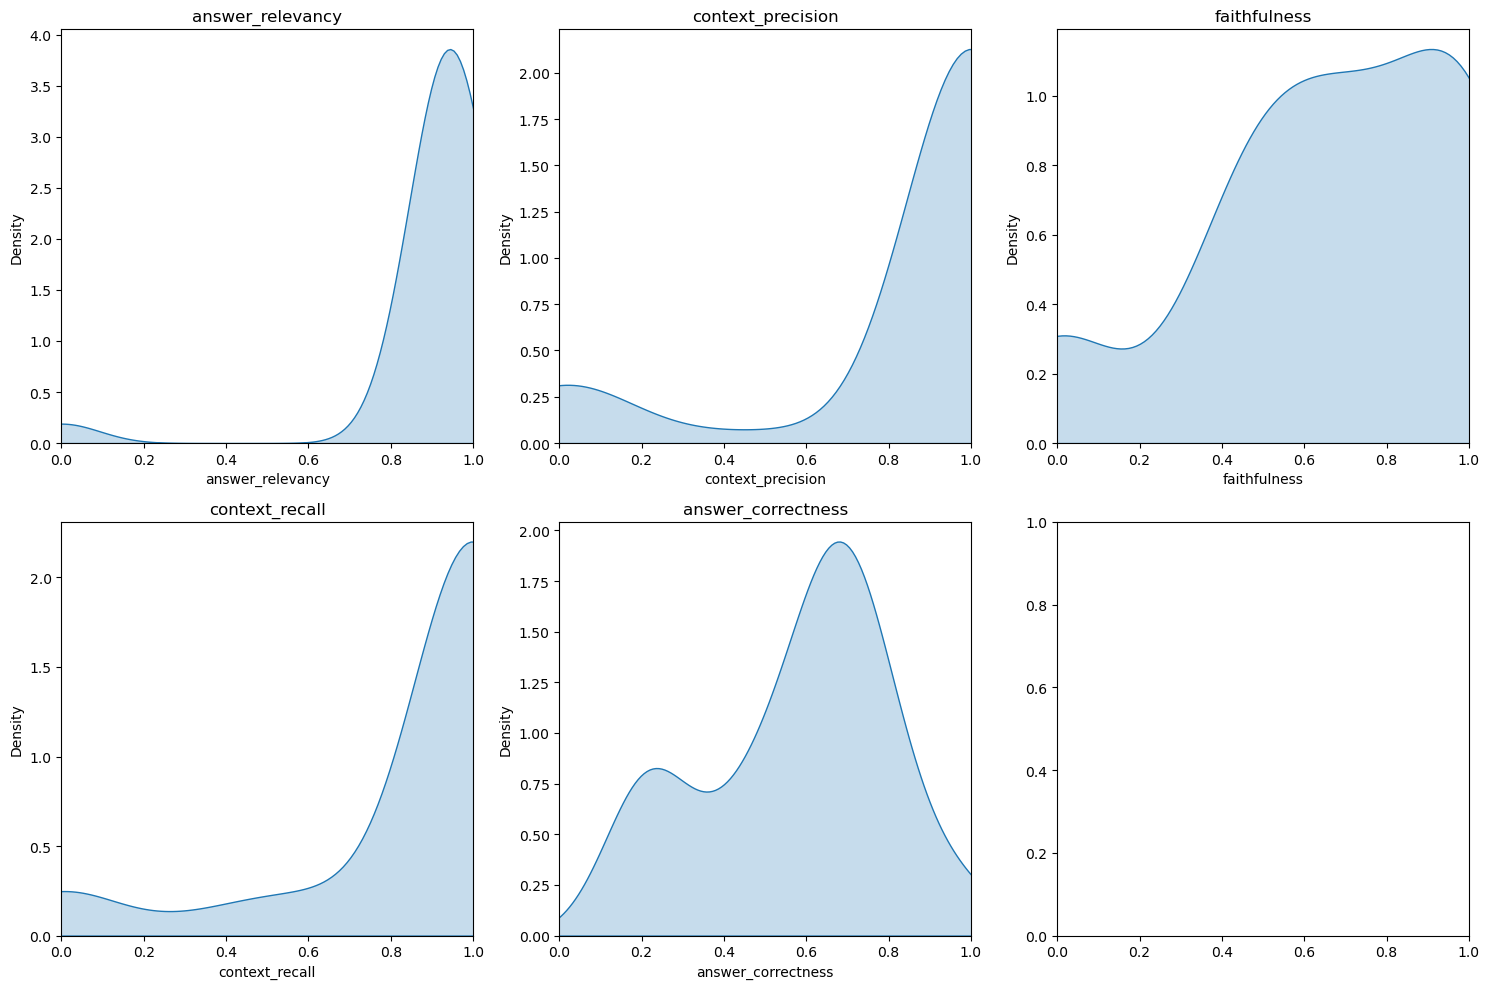

In [26]:
# example : PyPDFLoader + gpt-4o-2024-11-20 performance VISUALIZATION

import matplotlib.pyplot as plt
import seaborn as sns

finalmodel = performance_dict["PyPDFLoader_gpt-4o-2024-11-20"]

figure, ax = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

for row in range(2):
    for col in range(3):
        if (3*row+col) == 5:
            break
        data = finalmodel.iloc[:,-5+(3*row+col)]
        sns.kdeplot(data=data, fill=True, ax=ax[row, col])
        ax[row,col].set(title=performance_result.columns[-5+(3*row+col)])
        ax[row,col].set_xlim([0, 1])

plt.tight_layout()
plt.show()